# Imbalanced dataset 

In [3]:
import pandas as pd
import sqlite3

# load cleaned and transformed dataset from database
conn = sqlite3.connect('Disaster_database.db')
df = pd.read_sql('select * from overall', con=conn)
df.head()

,id,message,original,genre,related,request,offer,aid related,medical help,medical products,...,aid centers,other infrastructure,weather related,floods,storm,fire,earthquake,cold,other weather,direct report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
cat_df = df[df.columns[4:]]
cat_df.head()

,related,request,offer,aid related,medical help,medical products,search and rescue,security,military,child alone,...,aid centers,other infrastructure,weather related,floods,storm,fire,earthquake,cold,other weather,direct report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# save binary values ratio as a new dict values which paired with different categorical labels
imbalance_col = {}

for col in cat_df.columns:
    zero_ratio = round((cat_df[col]=='0').mean(), 2)
    imbalance_col[col] = [zero_ratio, round(1-zero_ratio,2)]

In [10]:
imbalance_col

{'related': [0.23, 0.77],
 'request': [0.83, 0.17],
 'offer': [1.0, 0.0],
 'aid related': [0.59, 0.41],
 'medical help': [0.92, 0.08],
 'medical products': [0.95, 0.05],
 'search and rescue': [0.97, 0.03],
 'security': [0.98, 0.02],
 'military': [0.97, 0.03],
 'child alone': [1.0, 0.0],
 'water': [0.94, 0.06],
 'food': [0.89, 0.11],
 'shelter': [0.91, 0.09],
 'clothing': [0.98, 0.02],
 'money': [0.98, 0.02],
 'missing people': [0.99, 0.01],
 'refugees': [0.97, 0.03],
 'death': [0.95, 0.05],
 'other aid': [0.87, 0.13],
 'infrastructure related': [0.93, 0.07],
 'transport': [0.95, 0.05],
 'buildings': [0.95, 0.05],
 'electricity': [0.98, 0.02],
 'tools': [0.99, 0.01],
 'hospitals': [0.99, 0.01],
 'shops': [1.0, 0.0],
 'aid centers': [0.99, 0.01],
 'other infrastructure': [0.96, 0.04],
 'weather related': [0.72, 0.28],
 'floods': [0.92, 0.08],
 'storm': [0.91, 0.09],
 'fire': [0.99, 0.01],
 'earthquake': [0.91, 0.09],
 'cold': [0.98, 0.02],
 'other weather': [0.95, 0.05],
 'direct report'

In [9]:
# create a new dataframe 
imbal_df = pd.DataFrame(data=imbalance_col)   
imbal_df 

,related,request,offer,aid related,medical help,medical products,search and rescue,security,military,child alone,...,aid centers,other infrastructure,weather related,floods,storm,fire,earthquake,cold,other weather,direct report
0,0.23,0.83,1.0,0.59,0.92,0.95,0.97,0.98,0.97,1.0,...,0.99,0.96,0.72,0.92,0.91,0.99,0.91,0.98,0.95,0.81
1,0.77,0.17,0.0,0.41,0.08,0.05,0.03,0.02,0.03,0.0,...,0.01,0.04,0.28,0.08,0.09,0.01,0.09,0.02,0.05,0.19


<ipython-input-7-8b23c70443f5>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(221)
<ipython-input-7-8b23c70443f5>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = plt.subplot(222)
<ipython-input-7-8b23c70443f5>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and

<AxesSubplot:>

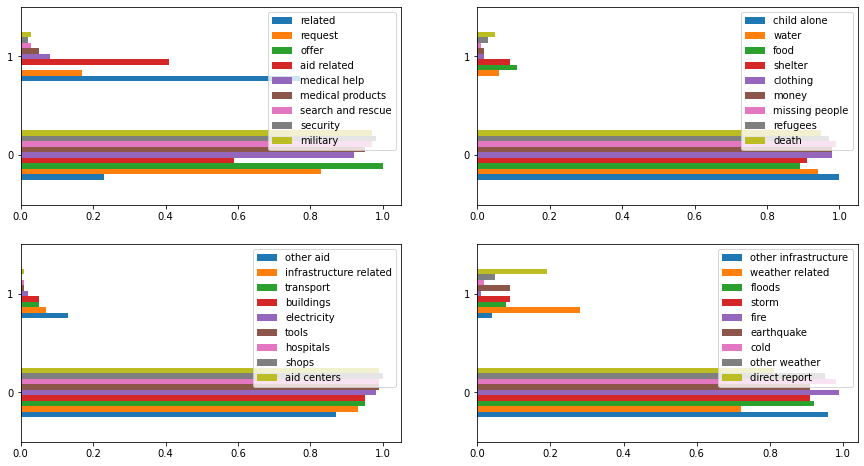

In [7]:
import matplotlib.pyplot as plt

# plot labels ratio
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
ax1 = plt.subplot(221)
imbal_df.iloc[:,:9].plot(kind='barh', ax=ax1)
plt.subplot(2,2,2)
ax2 = plt.subplot(222)
imbal_df.iloc[:,9:18].plot(kind='barh', ax=ax2)
#plt.figure(figsize=(10,8))
plt.subplot(2,2,3)
ax3 = plt.subplot(223)
imbal_df.iloc[:,18:27].plot(kind='barh', ax=ax3)
plt.subplot(2,2,4)
ax4 = plt.subplot(224)
imbal_df.iloc[:,27:].plot(kind='barh', ax=ax4)

As above, all of the categories are **imbalanced**, as most of the machine learning algorithms are developed with the assumption of the class is balanced, this case could lead to poor predictive performance for minority classes.